# VAR

## VAR 모듈 정리

| 클래스 이름 | 용도 |
|-------------|-----------------------------------------------|
| VARProcess | 미리 정해진 계수를 가진 $VAR$ 모형 |
| VAR | 주어진 자료의 계수를 추정하기 위한 $VAR$ 모형 |
| VARResults | 주어진 자료로 추정된 $VAR$ 모형 |

**1) VARProcess**

| 출력모듈 | 설명 |
|--------------------------------------|-----------------------------------------------------------|
| acf([nlags]) | 이론적인 공분산 함수(autocovariance function) 계산 |
| acorr([nlags]) | 이론적인 자기상관계수 함수(autocorrelation function) 계산 |
| forecast(y, steps) | 최소자승 미래 예측값 계산 |
| forecast_cov(steps) | 미래 예측 오차 공분산 행렬 계산 |
| forecast_interval(y, steps[, alpha]) | 미래 구간 예측 |
| get_eq_index(name) | 지정한 이름ㄹ 가진 정수 위치 반환 |
| is_stable([verbose]) | 안정성 계산 |
| long_run_effects() | 임펄스 함수의 장기 효과 계산 |
| ma_rep([maxn]) | $MA(\infty$) 계수 행렬 계산 |
| mean() | 기댓값 |
| mse(steps) | 이론적인 미래예측 오차 행렬 계산 |
| plot_acorr([nlags, linewidth]) | 이론적인 자기상관계수 함수 행렬 플롯 |
| plotsim([steps]) | 시물레이션 플롯 |

**2) VAR**

| 출력모듈 | 설명 |
|-------------|---------------|
| endog | 원자료 |
| endog_names | 원자료 변수명 |

**3) VARResults**

| 출력모듈 | 설명 |
|--------------|-------------------------------------------------|
| model | 추정 자료와 모형 차수 등을 가진 VAR 클래스 객체 |
| k_ar | AR 차수 |
| coefs | 추정된 AR 계수 |
| intercept | 추정된 trend constant |
| params | 추정된 전체 계수 (trend constant 포함) |
| bse | 추정된 전체 계수의 표준 오차 |
| tvalues | 추정된 계수의 t statistics |
| pvalues | 추정된 계수의 t statistics에 대한 p value |
| llf | Log Likelihood 값 |
| aic | AIC 값 |
| bic | AIC 값 |
| hqic | HQIC 값 |
| fittedvalues | 추정 모형에 의한 예측값 |
| resid | 추정 모형에 의한 잔차항(Residuals) |
| sigma_u | 추정 모형에 의한 잔차항의 분산 |

## 실습: VAR 데이터생성 및 이해

\begin{align*}
\text{Example of VAR(1)} && Y_{1t} &= 5 + 0.2 Y_{1t-1} + 0.3 Y_{2t-1} + e_{1t} \\
&& Y_{2t} &= 3 - 0.6 Y_{1t-1} + 1.1 Y_{2t-1} + e_{2t} \\
\end{align*}

In [1]:
import statsmodels

In [3]:
intercept = np.array([5,3])
A = np.array([[[0.2,0.3],
              [-0.6,1.1]]])
resid_cov = np.array([[1,0.8],[0.8,2]])

- 임의로 데이터 2개를 생성한 것
- 마치 유사한 패턴이 나오지만 다른 데이터르 임의로 생성한 것
    - 미국주식 and 한국주식
    - GDP and 수출
    
- auto corr 
    - 1,1 : Y1
    - 2,2 : Y2
    - 1,2 : Y1와 Y2
    - 2,1 : Y1와 Y2

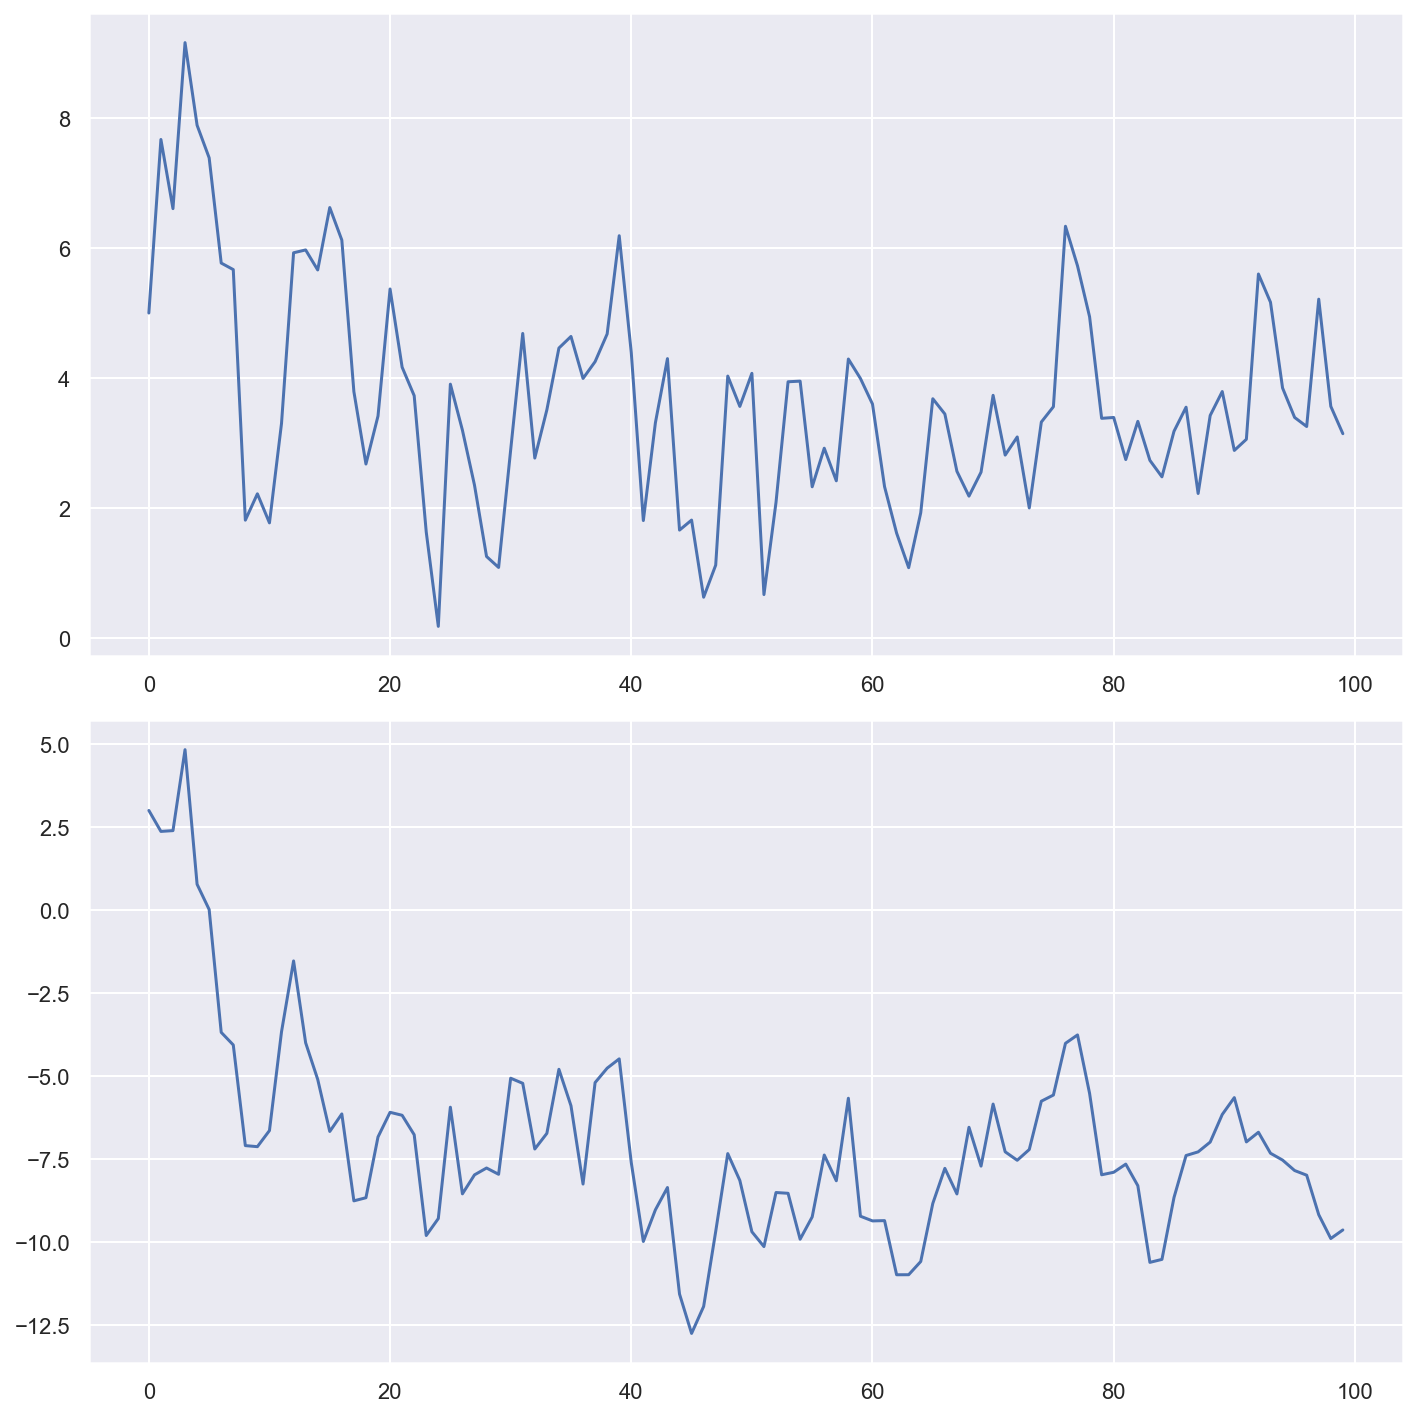

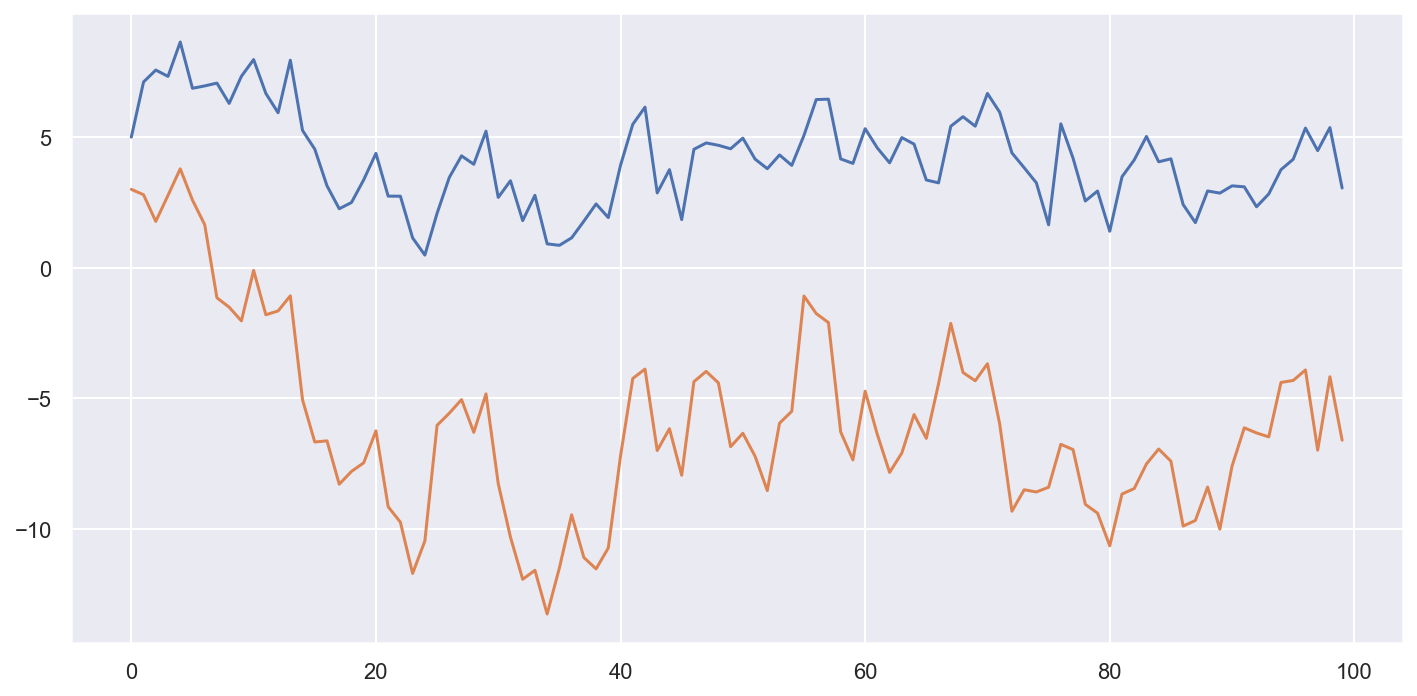

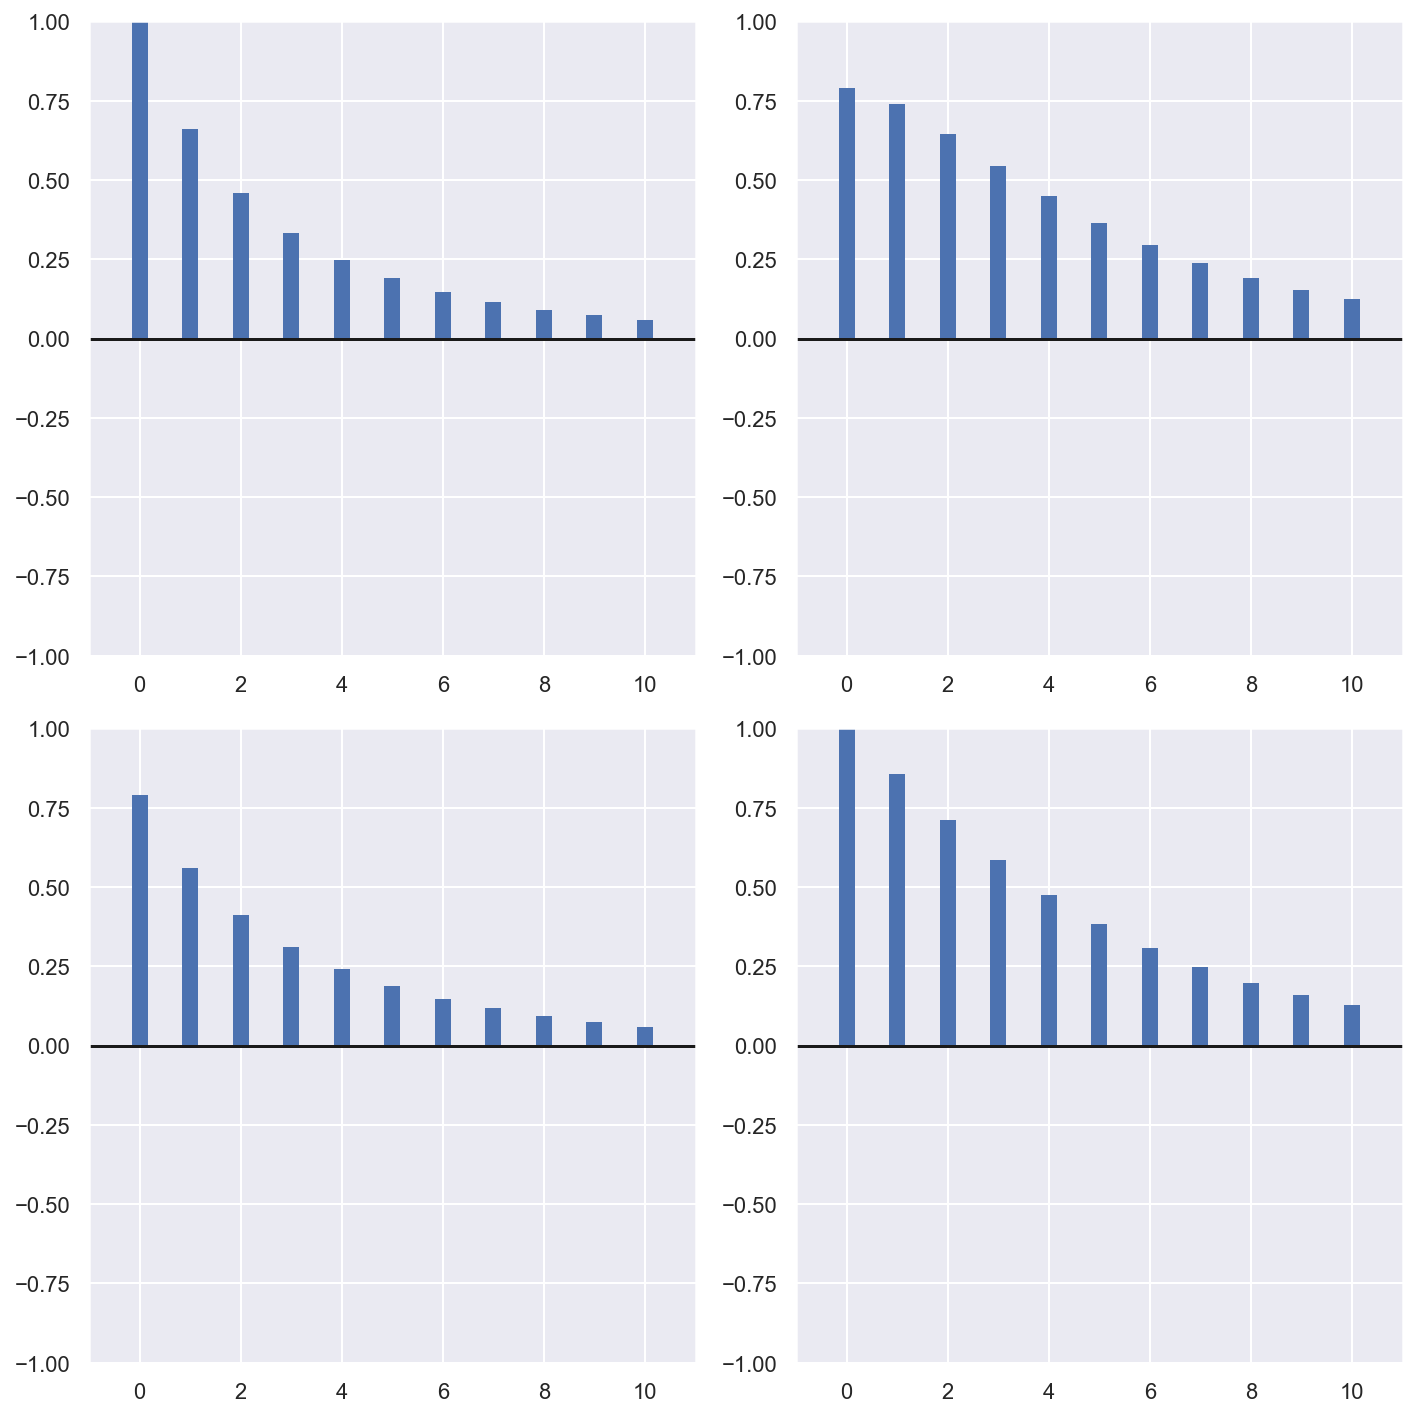

In [17]:
# VAR 데이터 생성
fit = sm.tsa.var.var_model.VARProcess(A, intercept, resid_cov)

# 시뮬레이션 시각화1
simul_num = 100
fit.plotsim(steps=simul_num, seed=123)
plt.tight_layout()
plt.show()

# 시뮬레이션 시각화2
simul_num = 100
simul_values = sm.tsa.var.util.varsim(fit.coefs, fit.intercept, fit.sigma_u, steps=simul_num)
plt.figure(figsize=(10,5))
plt.plot(simul_values)
plt.tight_layout()
plt.show()

#ACF 시각화
fit.plot_acorr()
plt.tight_layout()
plt.show()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Jun, 2021
Time:                     11:59:09
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.664634
Nobs:                     99.0000    HQIC:                  0.570989
Log likelihood:          -300.064    FPE:                    1.66095
AIC:                     0.507354    Det(Omega_mle):         1.56469
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         5.326482         0.797869            6.676           0.000
L1.y1         0.182200         0.115201            1.582           0.114
L1.y2         0.320829         0.056192            5.709           0.000

Results for equation 

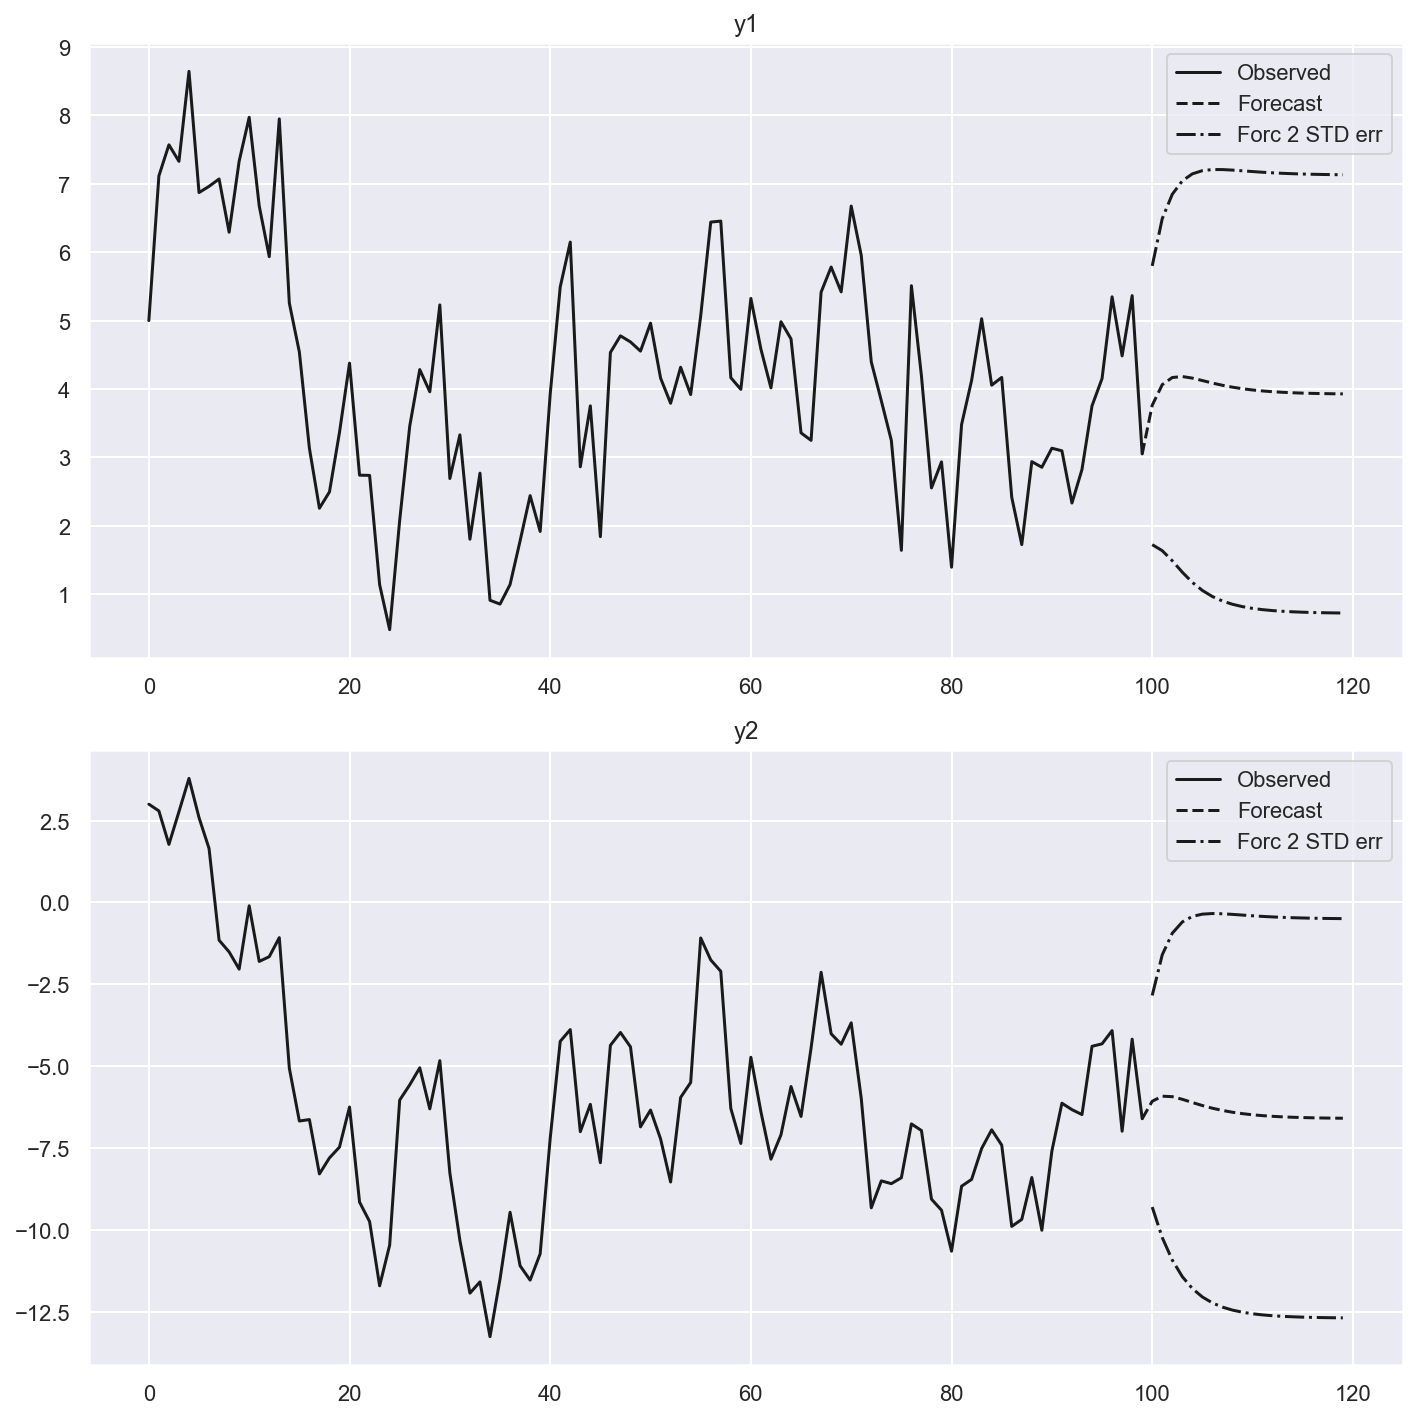

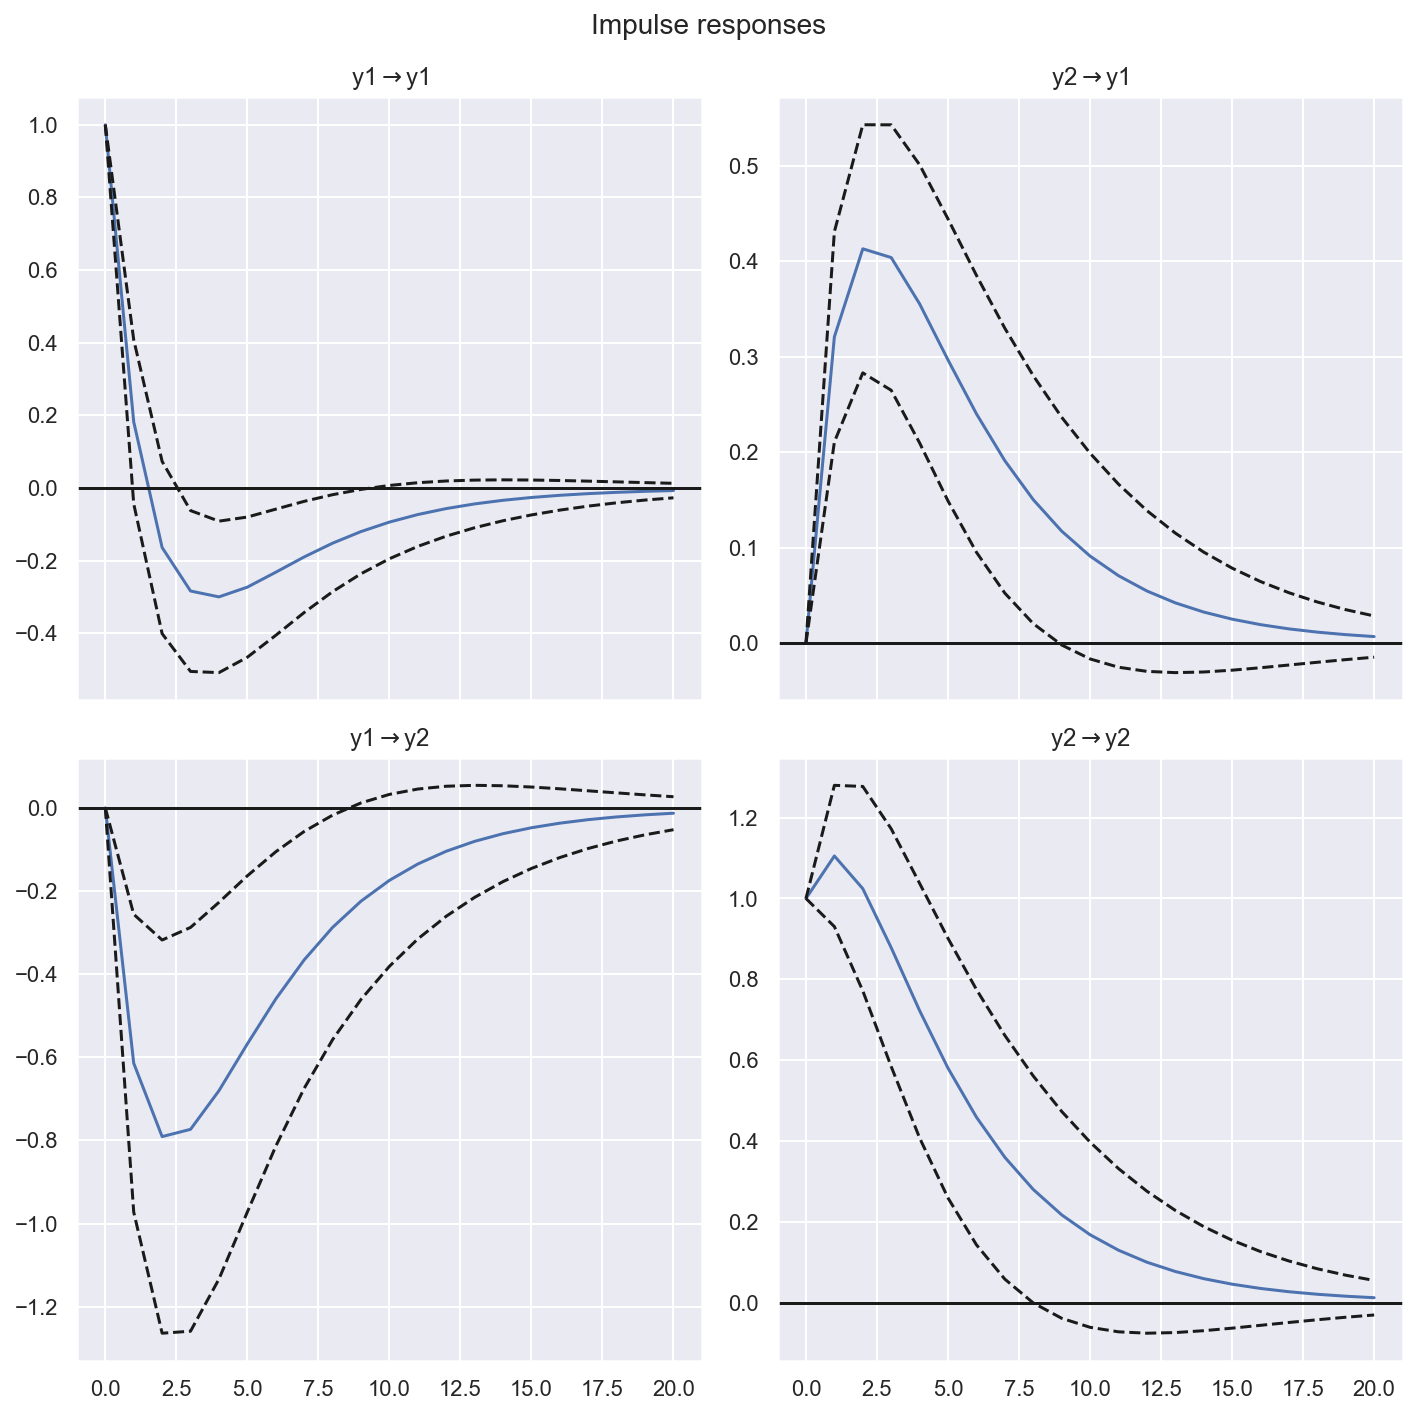

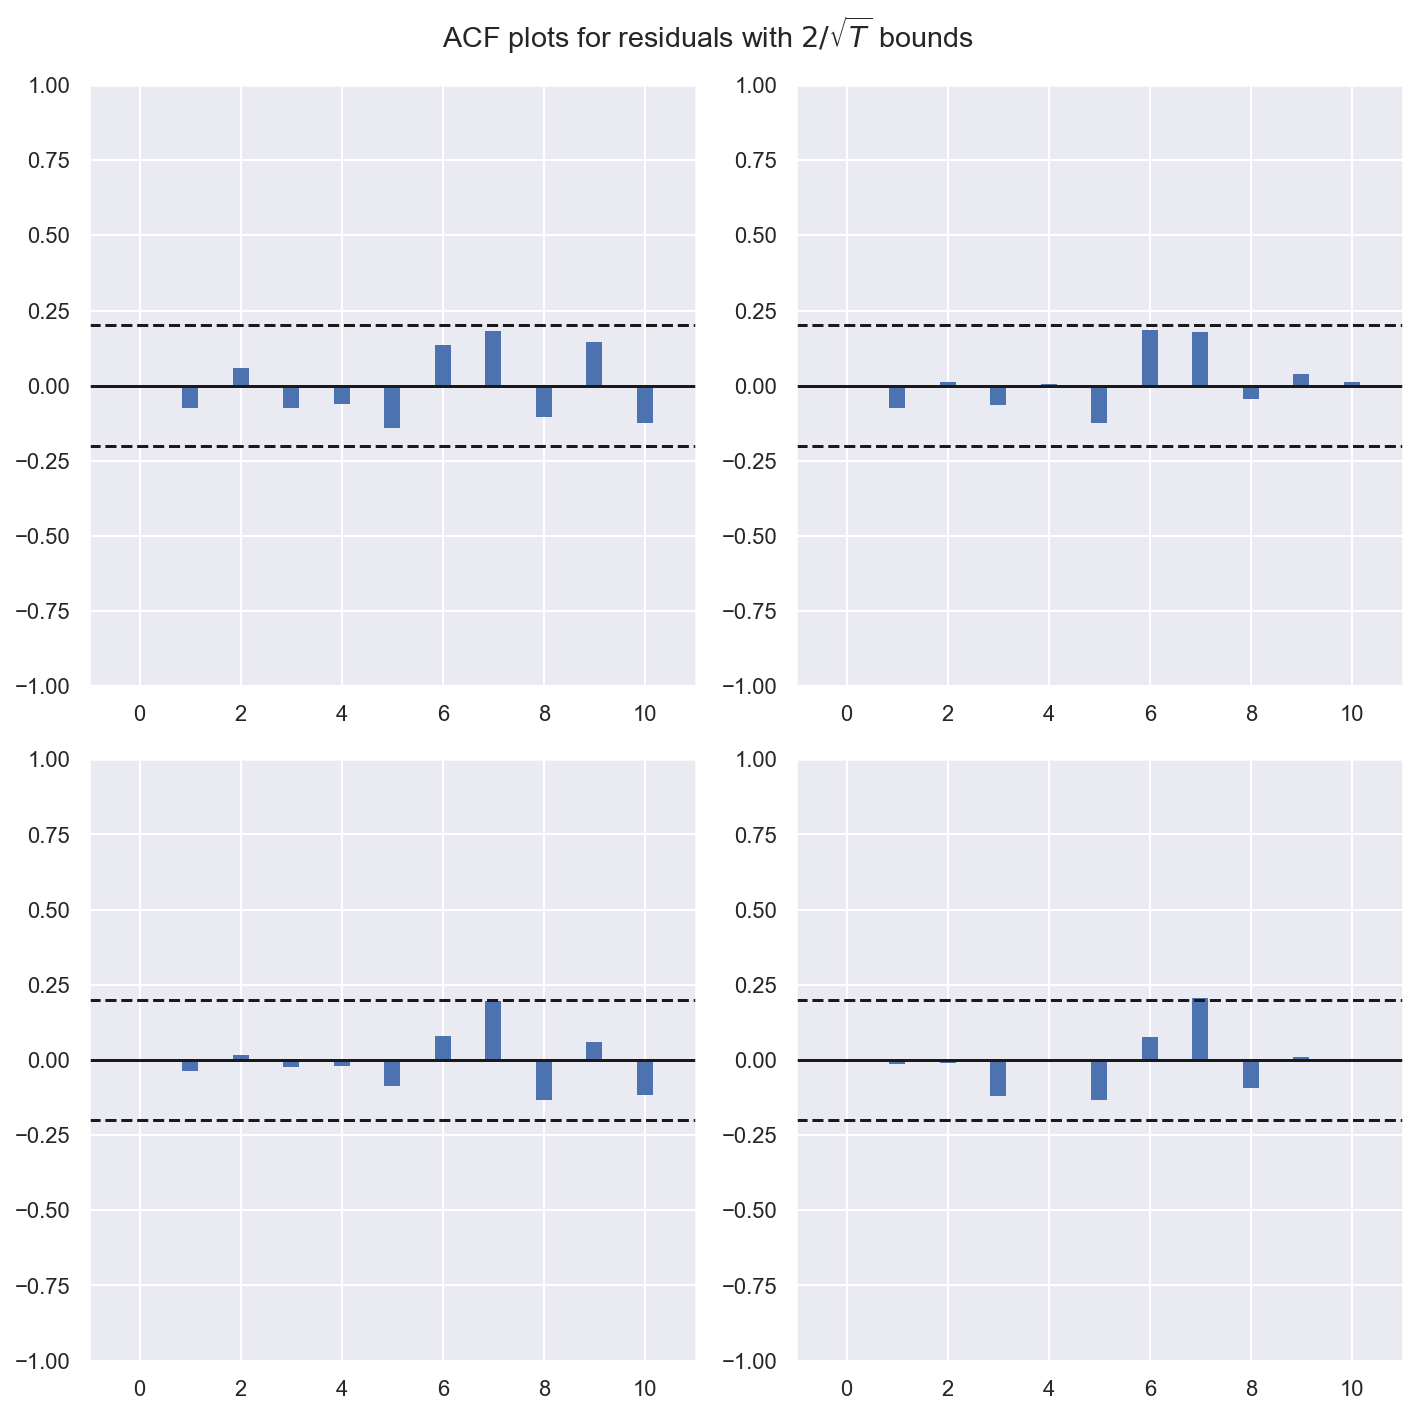

In [23]:
#VAR 모형적합
fit = sm.tsa.VAR(simul_values).fit()
display(fit.summary())

# 예측 및 시각화
forecast_num = 20
# fit.model.endog는 update하면서 최종값이 -1 index에 저장되어 있음.
pred_var = fit.forecast(fit.model.endog[-1:], steps=forecast_num)
pred_var_ci = fit.forecast_interval(fit.model.endog[-1:], steps=forecast_num)
fit.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

# 임펄스반응함수 추정
# y1이 1만큼 바뀔 때 y2가 어떻게 움직이는지
fit.irf(forecast_num).plot()
plt.tight_layout()
plt.show()

# 잔차진단
fit.plot_acorr()
plt.tight_layout()
plt.show()

## 실습 : 거시경제 VAR 모형화 및 해석

- **데이터설명:** [링크](http://www.statsmodels.org/0.6.1/datasets/generated/macrodata.html)

- statsmodels에 저장되어 있는 데이터
- 1959Q1 ~ 2009Q3 -> 203개의 observations


year      - 1959q1 - 2009q3

quarter   - 1-4

realgdp   - Real gross domestic product (Bil. of chained 2005 US\$,
            seasonally adjusted annual rate)
            
realcons  - Real personal consumption expenditures (Bil. of chained
            2005 US\$, seasonally adjusted annual rate)
            
realinv   - Real gross private domestic investment (Bil. of chained
            2005 US\$, seasonally adjusted annual rate)
            
realgovt  - Real federal consumption expenditures \& gross investment
            (Bil. of chained 2005 US\$, seasonally adjusted annual rate)
            
realdpi   - Real private disposable income (Bil. of chained 2005
            US\$, seasonally adjusted annual rate)
            
cpi       - End of the quarter consumer price index for all urban
            consumers: all items (1982-84 = 100, seasonally adjusted).
            
m1        - End of the quarter M1 nominal money stock (Seasonally
            adjusted)
            
tbilrate  - Quarterly monthly average of the monthly 3-month
            treasury bill: secondary market rate
            
unemp     - Seasonally adjusted unemployment rate (\%)

pop       - End of the quarter total population: all ages incl. armed
            forces over seas
            
infl      - Inflation rate (ln($cpi_{t}$/$cpi_{t-1}$) * 400)

realint   - Real interest rate (tbilrate - infl)

In [24]:
raw = sm.datasets.macrodata.load_pandas().data
dates_info = raw[['year', 'quarter']].astype(int).astype(str)
raw.index = pd.DatetimeIndex(sm.tsa.datetools.dates_from_str(dates_info['year'] + 'Q' + dates_info['quarter']))
raw_use = raw.iloc[:,2:5]

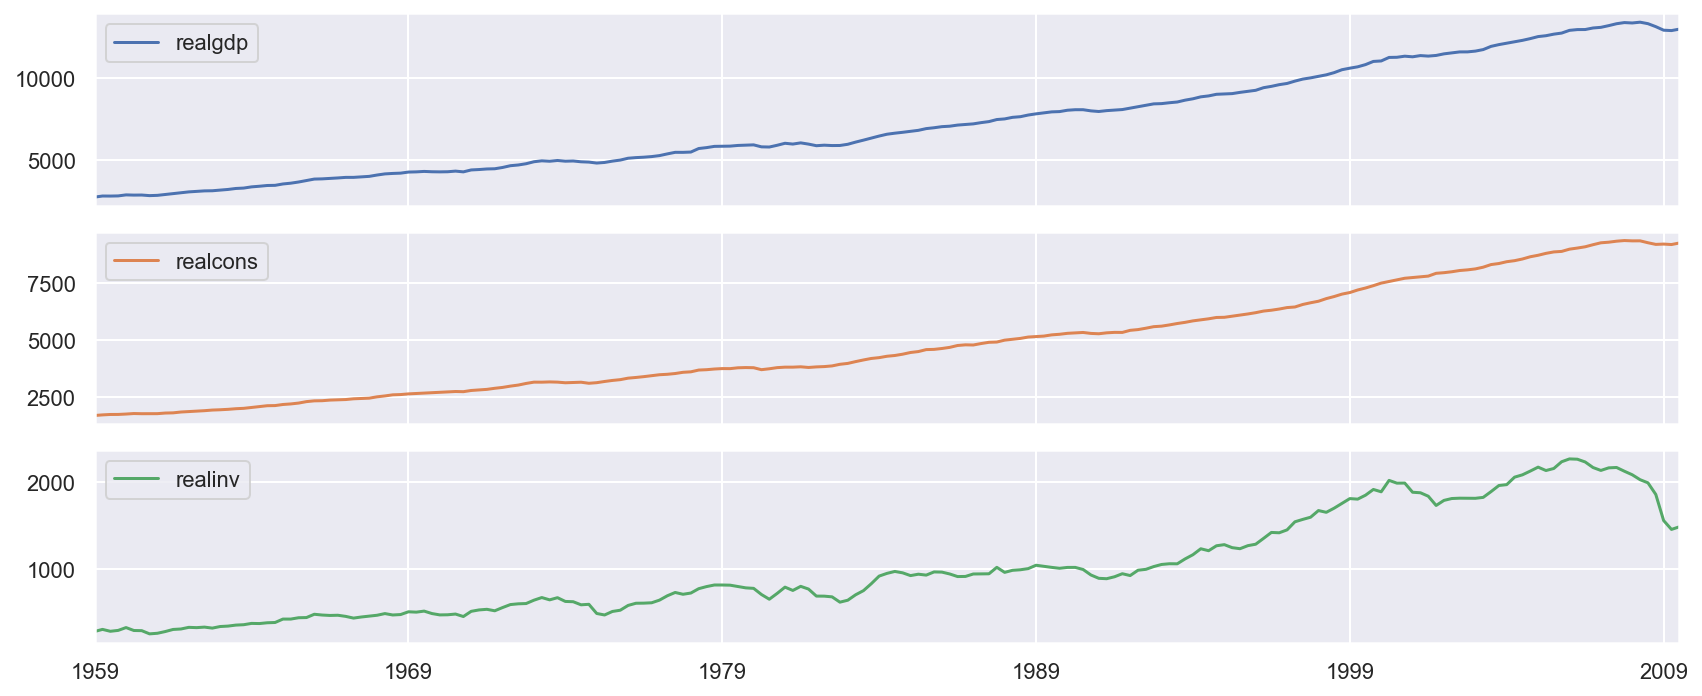

In [25]:
raw_use.plot(subplots=True, figsize=(12,5))
plt.tight_layout()
plt.show()

- 위 데이터에서 증가 **추세**가 보임

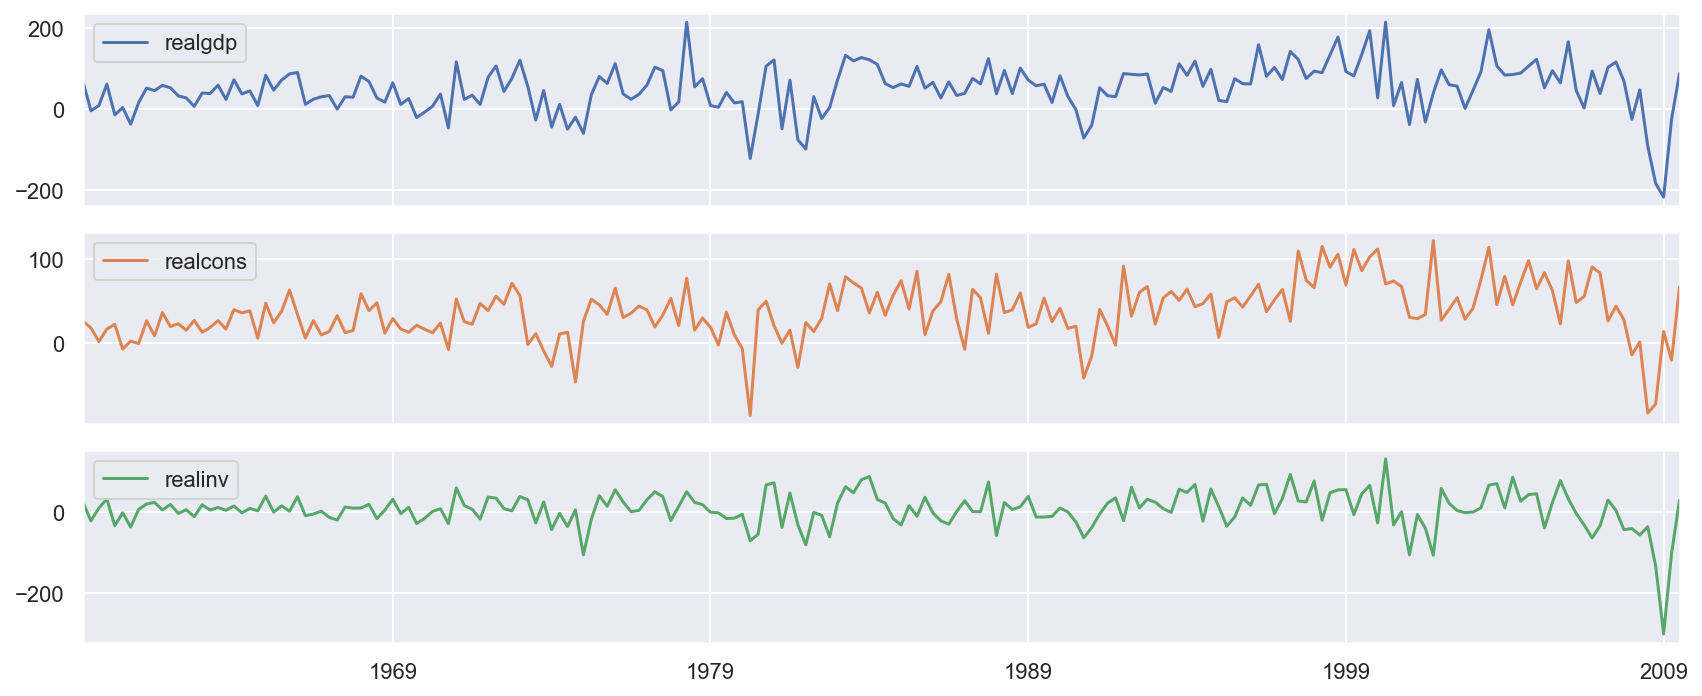

In [26]:
raw_use.diff(1).dropna().plot(subplots=True, figsize=(12,5))
plt.tight_layout()
plt.show()

In [27]:
# VAR 모형적합
raw_use_return = raw_use.diff(1).dropna()

# VAR(2)
fit=  sm.tsa.VAR(raw_use_return).fit(maxlags=2)
display(fit.summary())

C:\Users\Hobin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Jun, 2021
Time:                     13:27:26
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    20.5675
Nobs:                     200.000    HQIC:                   20.3614
Log likelihood:          -2852.49    FPE:                6.05346e+08
AIC:                      20.2212    Det(Omega_mle):     5.45987e+08
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              10.308143         6.425207            1.604           0.109
L1.realgdp         -0.394370         0.148481           -2.656           0.008
L1.realcons         1.185980         0.186610            6.355    

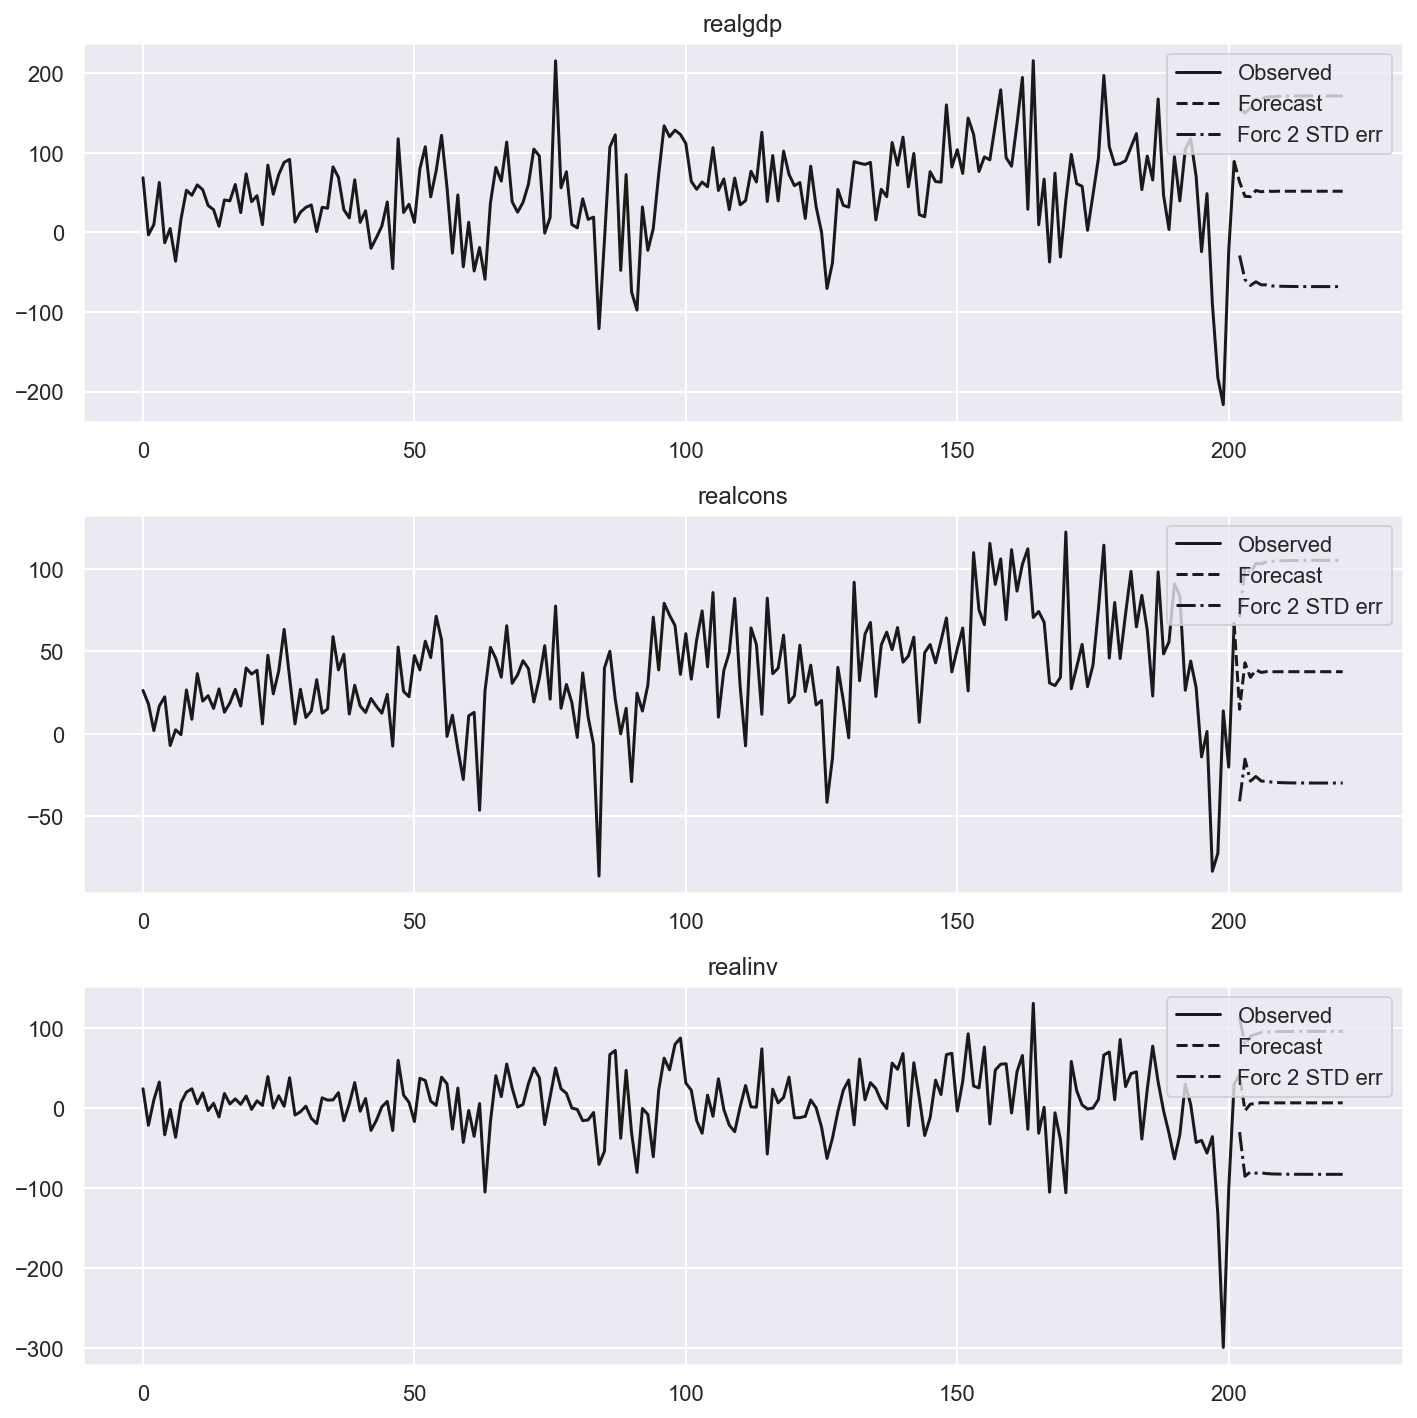

In [35]:
forecast_num = 20

#pred_var = fit.forecast(fit.model.endog[-1:], steps=forecast_num)
#pred_var_ci = fit.forecast_interval(fit.model.endog[-1:], steps=forecast_num)

fit.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

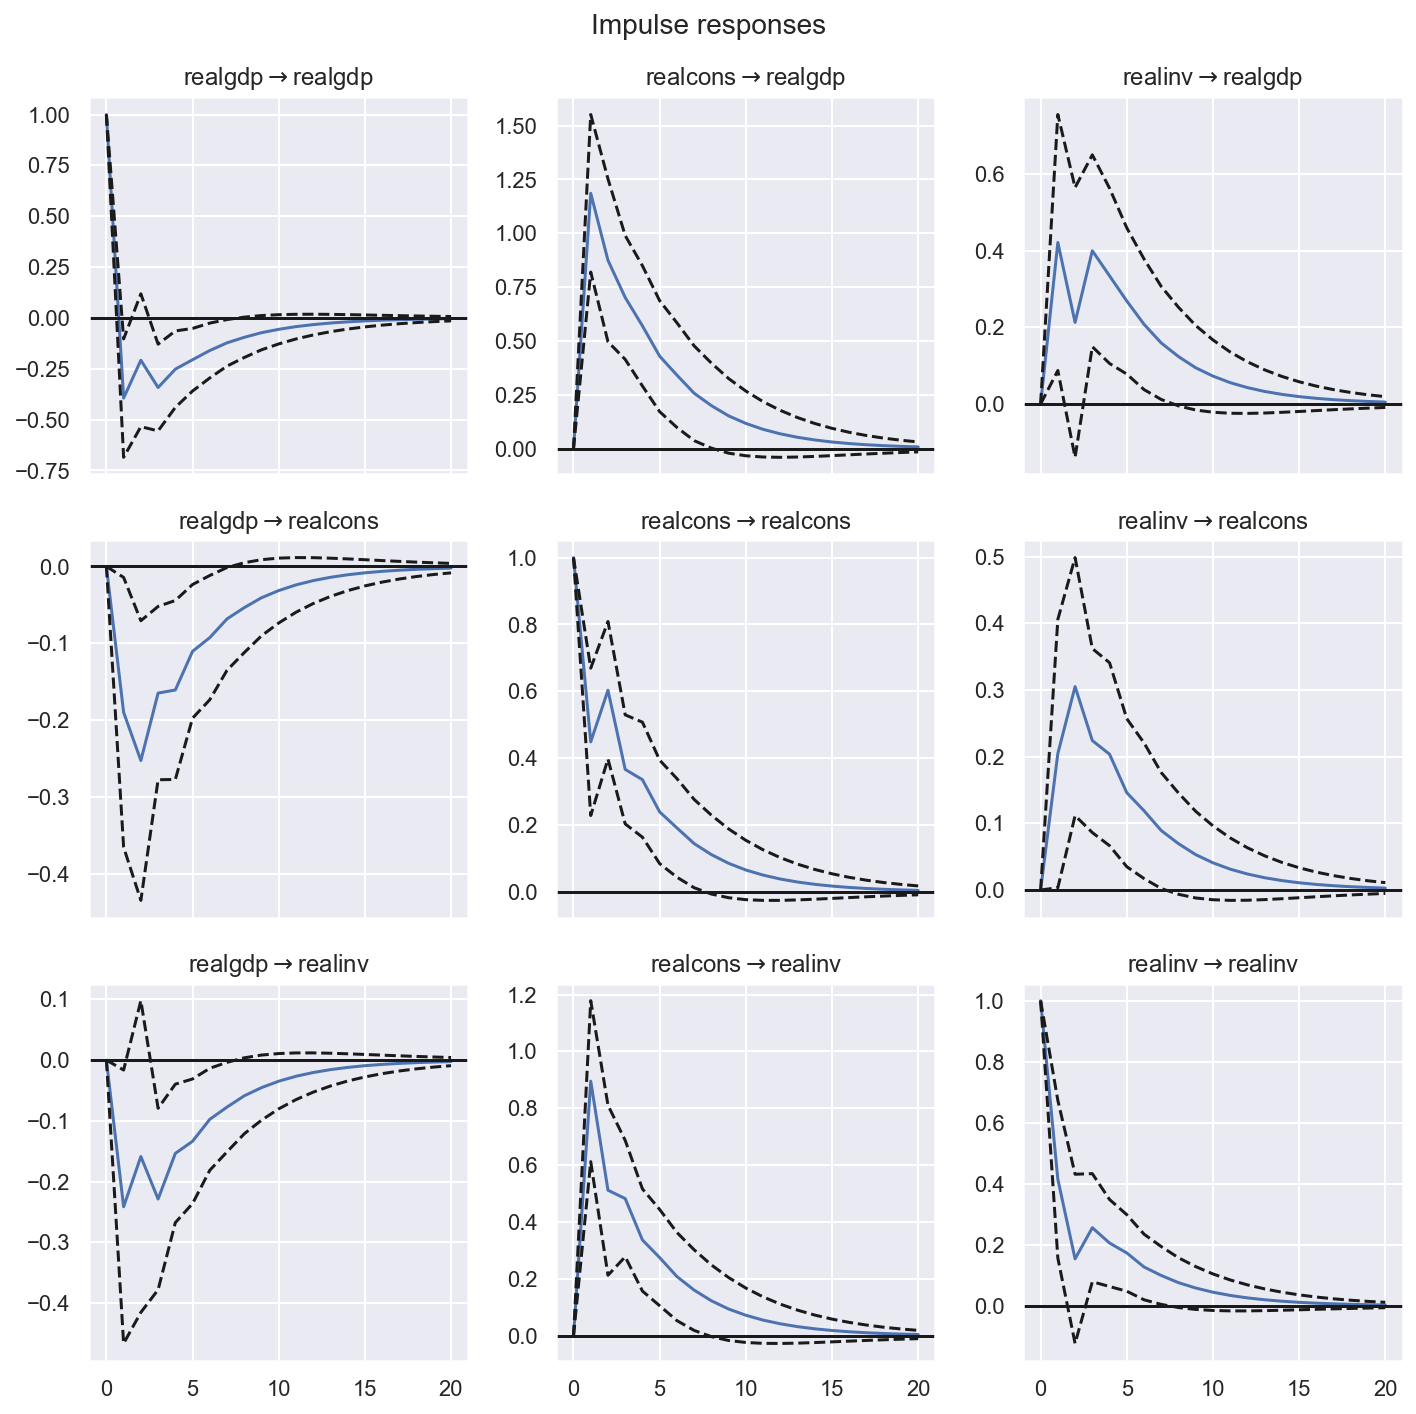

In [36]:
# 임펄스반응함수 추정
fit.irf(forecast_num).plot()
plt.tight_layout()
plt.show()

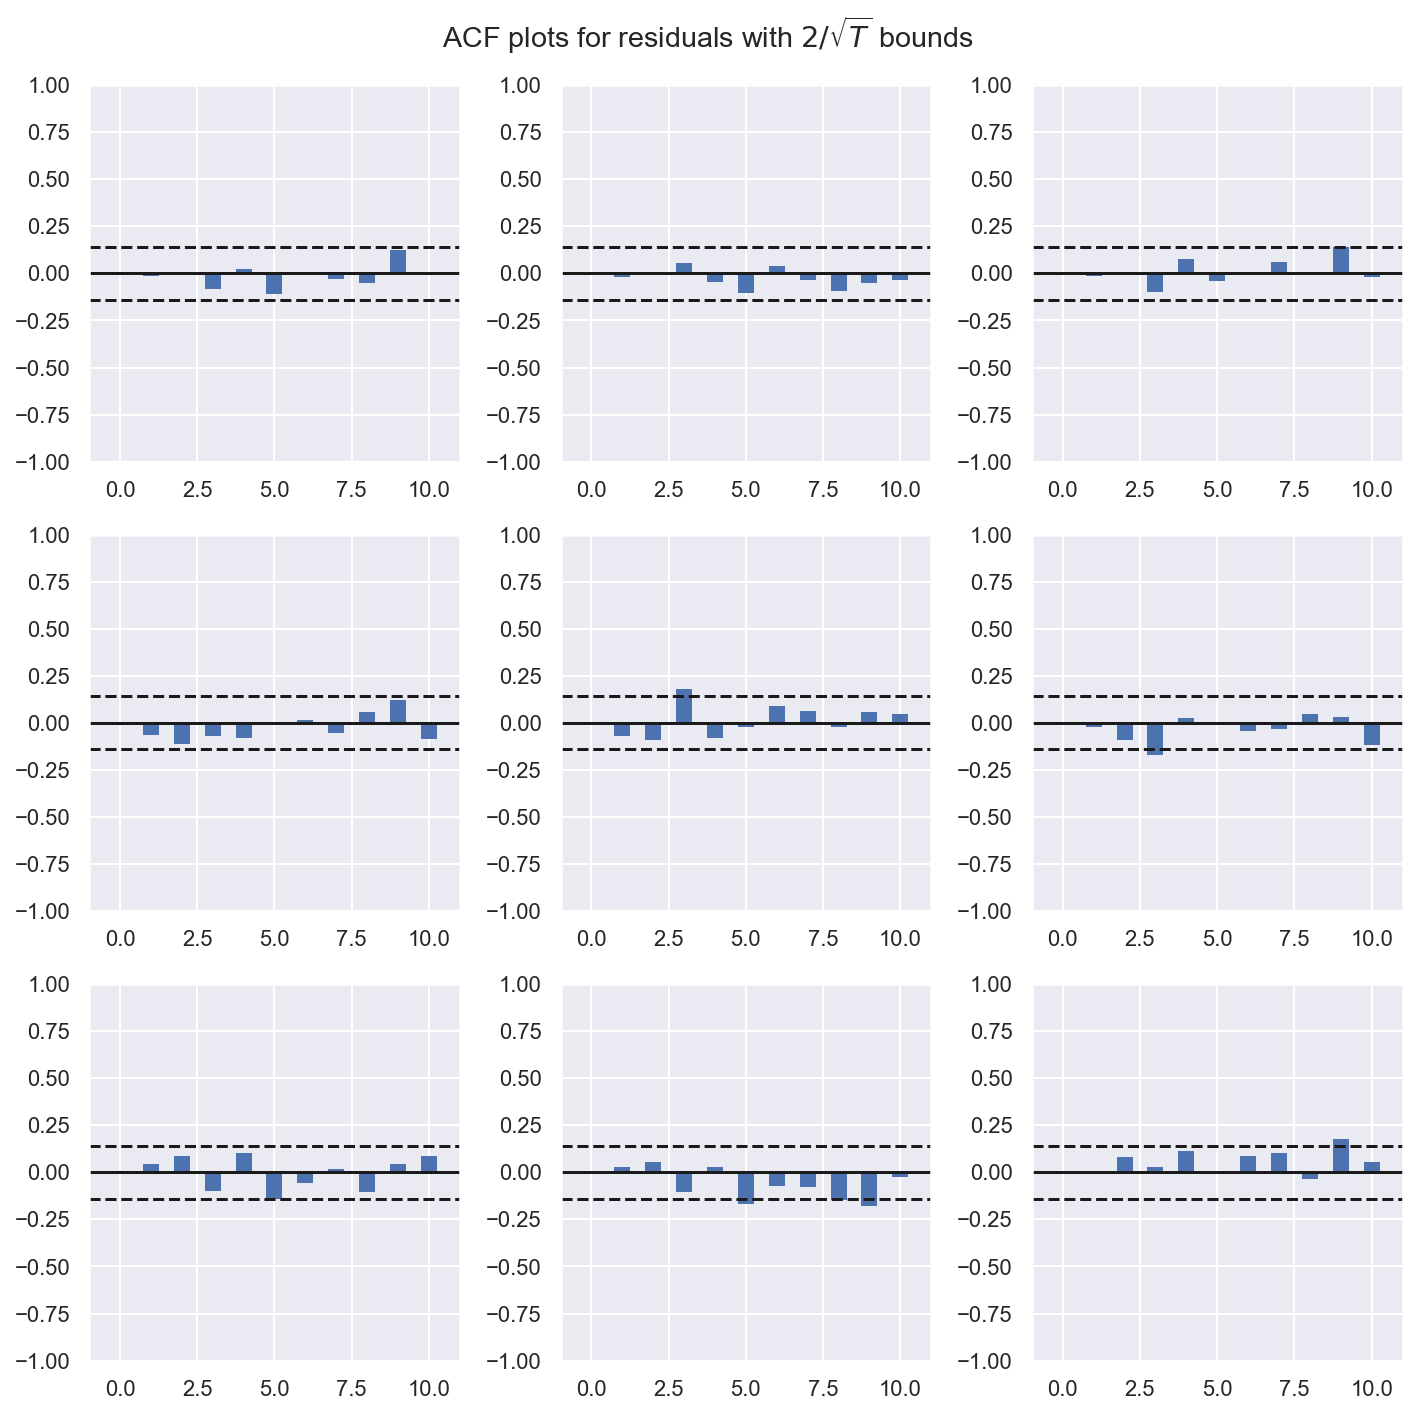

In [38]:
# 잔차진단
fit.plot_acorr()
plt.tight_layout()
plt.show()

# Granger Causality

## 닭과 달걀의 생산량

In [1]:
# 데이터 로딩
location = './Data/ChickenEggProduction/Chicken_Egg_Production.txt'
raw_all = pd.read_csv(location, sep='\t')
raw_all.head()

,Year,Chicken,Egg
0,1930,468491,3581
1,1931,449743,3532
2,1932,436815,3327
3,1933,444523,3255
4,1934,433937,3156


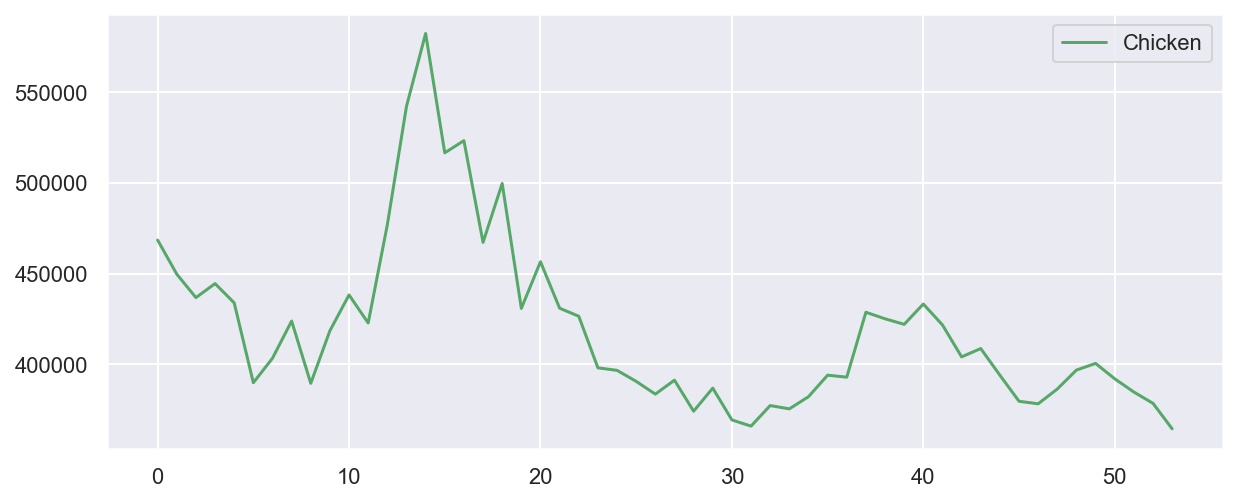

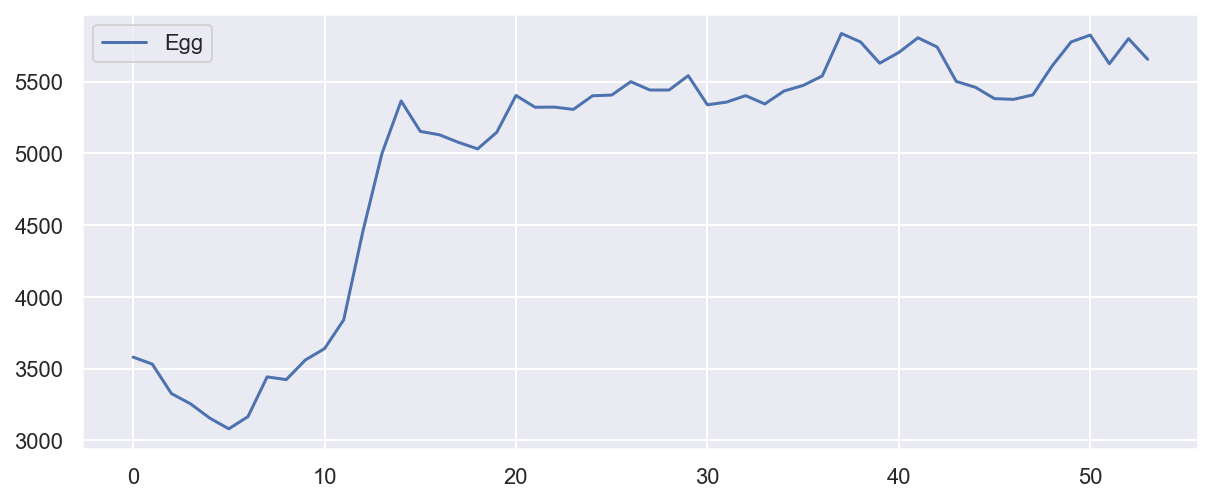

In [2]:
# 데이터 시각화
plt.figure(figsize=(10,4))
plt.plot(raw_all['Chicken'], 'g', label='Chicken')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(raw_all['Egg'], 'b', label='Egg')
plt.legend()
plt.show()

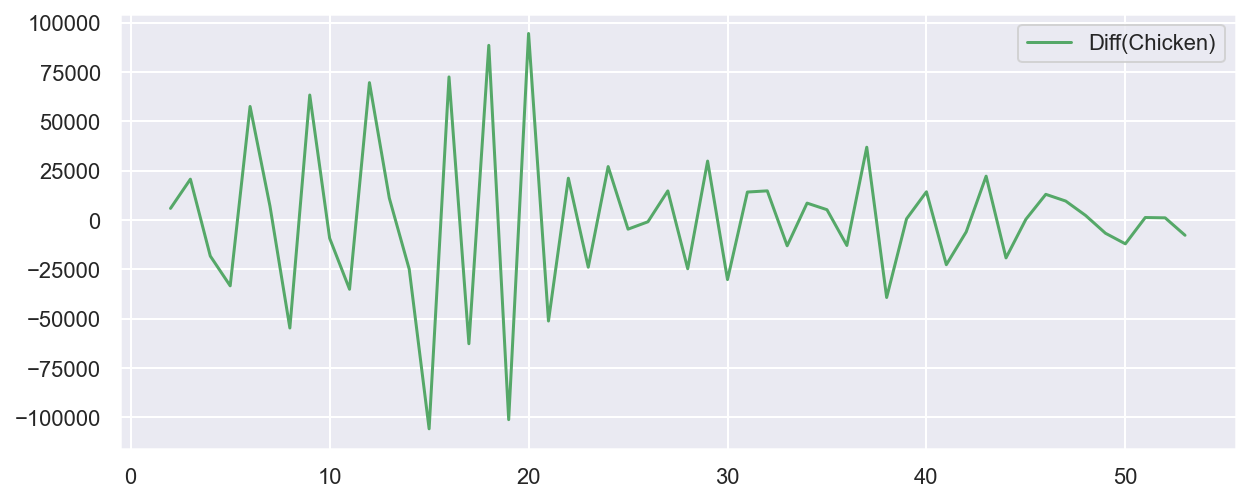

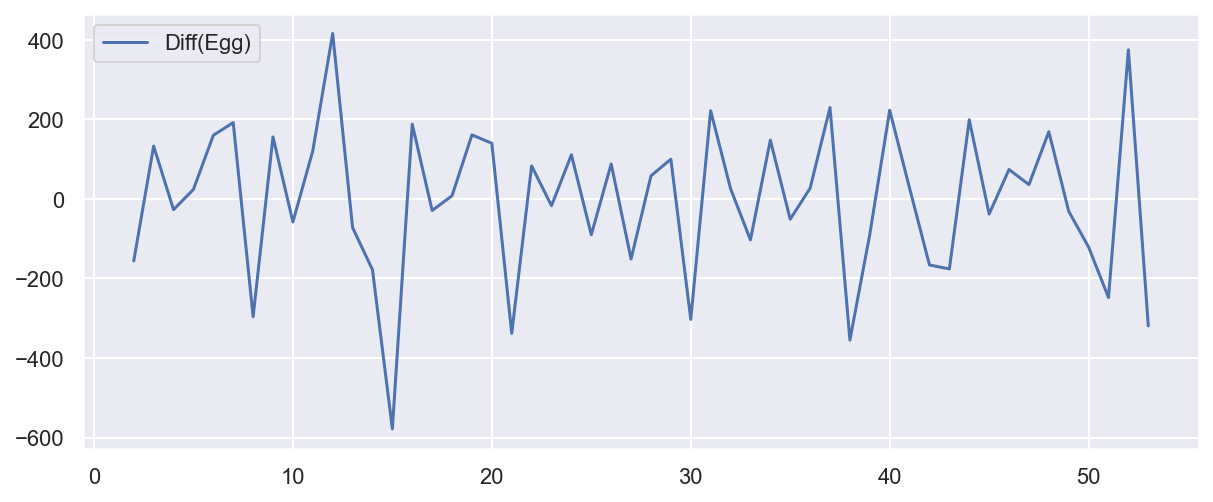

In [4]:
# 정상성 변환 시각화
plt.figure(figsize=(10,4))
plt.plot(raw_all['Chicken'].diff(1).diff(1), 'g', label='Diff(Chicken)')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(raw_all['Egg'].diff(1).diff(1), 'b', label='Diff(Egg)')
plt.legend()
plt.show()

> **두번째 칼럼에 있는 series가 첫번쨰 칼럼에 있는 Series를 그랜저 cause한다.**

In [10]:
raw_all.diff(1).dropna().iloc[:,1:].tail()

,Chicken,Egg
49,3652.0,169.0
50,-8475.0,48.0
51,-7272.0,-200.0
52,-6229.0,175.0
53,-14025.0,-144.0


In [12]:
# Granger Causality 테스트
print('\n[Egg -> Chicken]')
granger_result1 = sm.tsa.stattools.grangercausalitytests(raw_all.diff(1).dropna().iloc[:,1:].values, maxlag=3, verbose=True)
print('\n[Chicken -> Egg]')
granger_result2 = sm.tsa.stattools.grangercausalitytests(raw_all.diff(1).dropna().iloc[:,[2,1]].values, maxlag=3, verbose=True)

# 의사결정
# 닭이 달걀을 낳으면 그 수는 약 3년후까지 닭의 수에 영향을 준다
# 닭의 수가 많아진다고해서 달걀을 많이 낳지는 않는다
# 달걀 -> 닭 (Granger Causality)


[Egg -> Chicken]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.3694 , p=0.0023  , df_denom=49, df_num=1
ssr based chi2 test:   chi2=11.0043 , p=0.0009  , df=1
likelihood ratio test: chi2=9.9819  , p=0.0016  , df=1
parameter F test:         F=10.3694 , p=0.0023  , df_denom=49, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.9196  , p=0.0268  , df_denom=46, df_num=2
ssr based chi2 test:   chi2=8.6913  , p=0.0130  , df=2
likelihood ratio test: chi2=8.0254  , p=0.0181  , df=2
parameter F test:         F=3.9196  , p=0.0268  , df_denom=46, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9318  , p=0.0441  , df_denom=43, df_num=3
ssr based chi2 test:   chi2=10.2270 , p=0.0167  , df=3
likelihood ratio test: chi2=9.3049  , p=0.0255  , df=3
parameter F test:         F=2.9318  , p=0.0441  , df_denom=43, df_num=3

[Chicken -> Egg]

Granger Causality
number of lags (no zero) 1
ssr based F test: 

## 삼성전자와 삼성전자 우선주

In [14]:
# 데이터 로딩
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2018, 12, 31)
raw1 = web.DataReader("005930.KS", 'yahoo', start, end) #삼전
raw2 = web.DataReader("005935.KS", 'yahoo', start, end) #삼전 우선주
# raw2 = web.DataReader("009150.KS", 'yahoo', start, end)

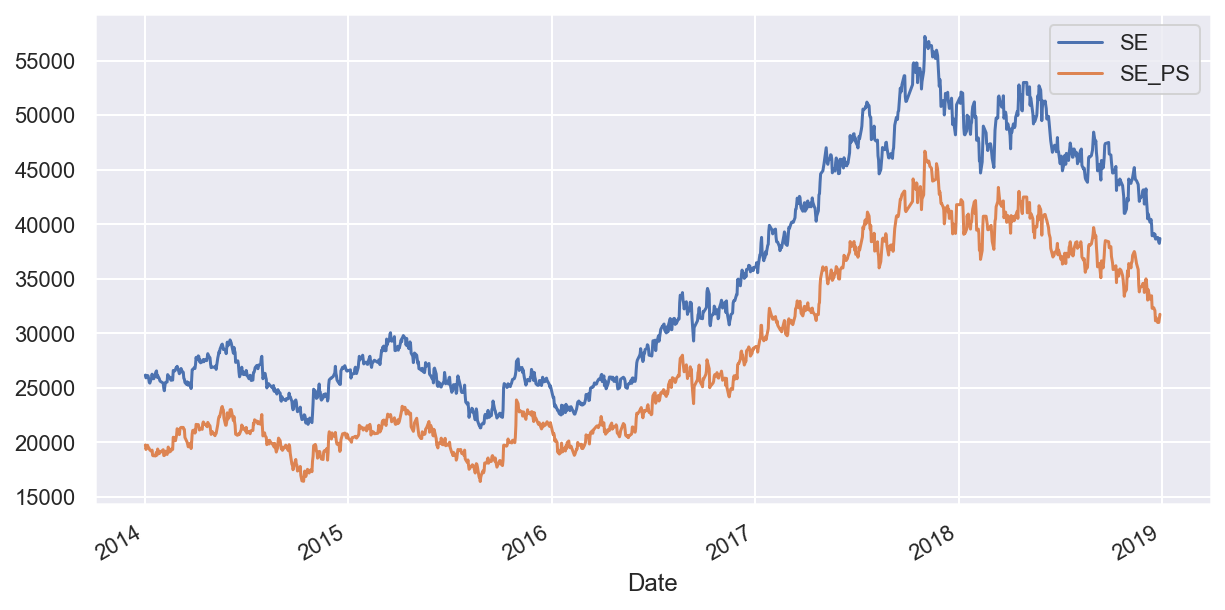

In [15]:
# 데이터 시각화
raw = pd.concat([raw1.Close, raw2.Close], axis=1).dropna()
raw.columns = ["SE", "SE_PS"]
raw.plot(figsize=(10,5))
plt.show()

In [17]:
# 비정상성 차수 추론
target = raw.SE.copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
integ_result

Test Statistics        -1.049695
p-value                 0.734711
Used Lag                3.000000
Used Observations    1217.000000
dtype: float64

In [19]:
Y1_integ_order = 0
if integ_result[1] > 0.1:
    Y1_integ_order = Y1_integ_order + 1

target = raw.SE_PS.copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y2_integ_order = 0
if integ_result[1] > 0.1:
    Y2_integ_order = Y2_integ_order + 1
print('Y1_order: ', Y1_integ_order, 'Y2_order: ', Y2_integ_order)

Y1_order:  1 Y2_order:  1


In [21]:
# Granger Causality 테스트
print('\n[삼성전자우 -> 삼성전자]')
granger_result1 = sm.tsa.stattools.grangercausalitytests(raw.diff(1).dropna().values, maxlag=4, verbose=True)
print('\n[삼성전자 -> 삼성전자우]')
granger_result1 = sm.tsa.stattools.grangercausalitytests(raw.diff(1).dropna().iloc[:,[1,0]].values, maxlag=4, verbose=True)


[삼성전자우 -> 삼성전자]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8613  , p=0.0496  , df_denom=1216, df_num=1
ssr based chi2 test:   chi2=3.8708  , p=0.0491  , df=1
likelihood ratio test: chi2=3.8647  , p=0.0493  , df=1
parameter F test:         F=3.8613  , p=0.0496  , df_denom=1216, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5263  , p=0.0297  , df_denom=1213, df_num=2
ssr based chi2 test:   chi2=7.0818  , p=0.0290  , df=2
likelihood ratio test: chi2=7.0613  , p=0.0293  , df=2
parameter F test:         F=3.5263  , p=0.0297  , df_denom=1213, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.6935  , p=0.0448  , df_denom=1210, df_num=3
ssr based chi2 test:   chi2=8.1273  , p=0.0435  , df=3
likelihood ratio test: chi2=8.1002  , p=0.0440  , df=3
parameter F test:         F=2.6935  , p=0.0448  , df_denom=1210, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:        

# 공적분

- **공적분 상태(Cointegration):** 두 비정상성 시계열을 선형조합(Linear Combination)하여 생성한 시계열의 적분(Integration) 차수가 낮아지거나 정상상태가 되는 경우

- **공적분 벡터(Cointegration Vector):** 이러한 선형 조합을 만드는 값

- **공적분 시계열(Cointegration Time Series):**
    - 서로 상관관계를 가지지 않음에도 불구하고 장기적으로 같은 방향으로 움직이는 특성
    - 술취한 사람이 개를 끈에 묶어 다니는 경우, 사람과 개는 각자 아무런 상관관계가 없이 움직이지만 서로 너무 멀어지지는 않는 것과 유사
    - 페어 트레이딩 (Pair Trading), 통계적 차익거래 (Statistical Arbitrage) 등의 매매전략에 응용 가능
   
\begin{align*}
\text{Each Integration Order} && Y_1 &\sim I(d_1) \\
&& Y_2 &\sim I(d_2) \\
\text{Cointegration Vector} && \alpha &= [\alpha_1, \alpha_2] \\
\text{where} && \alpha_1 Y_1 &+ \alpha_2 Y_2 \sim I(b), \;\; b < d_1, \;\; b < d_2 \\
\end{align*}

- **공적분 판별:**
> **Engle-Granger's Representation Theorem (Vector Error Correction Model)**
> \begin{align*}
\text{두 시계열 $Y_{1t} \sim I(1)$, $Y_{2t} \sim I(1)$이 공적분}
& \iff \Delta Y_{2t} = \gamma_1 z_{t-1}  + \sum_{i=1}^K \psi_{1,i} \Delta Y_{1t-i} + \sum_{i=1}^L \psi_{2,i} \Delta Y_{2t-i} + e_{t} \\
& \text{($z_t$는 $Y_{2t}$를 종속변수로 $Y_{1t}$를 독립변수로 회귀분석하여 만들어진 잔차)} \\
\end{align*}
> - $\Delta Y_{1t}$와 $\Delta Y_{2t}$는 항상 정상성 시계열
> - 위 식이 성립하려면 $z_t$와 $e_t$가 정상성 시계열이어야 함   
    1) $Y_{2t}$를 종속변수로 $Y_{1t}$를 독립변수로 회귀분석하여 만들어진 잔차 $z_t$가 정상성 시계열인지를 확인   
    2) 변환된 변수들의 $VECM$ 회귀 분석의 잔차 $e_t$가 정상성 시계열인지를 확인

## 실습: Cointegration 데이터 생성 및 이해

\begin{align*}
\text{Example of Cointegration} \\
\text{Y1: Random Walk with I(1)} && Y_{1t} &= Y_{1t-1} + e_{1t} \\
\text{Y2: Random Walk with I(1)} && Y_{2t} &= 0.6 Y_{1t} + e_{2t} \\
\text{Y: Stationary Time Series} && Y &= 0.6 Y_{1t} - Y_{2t} \\
\end{align*}

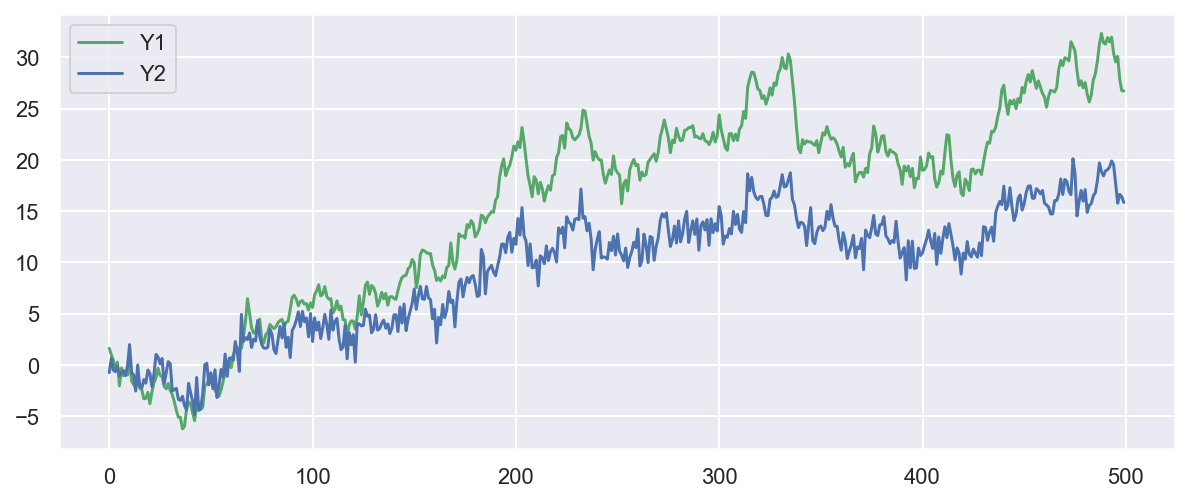

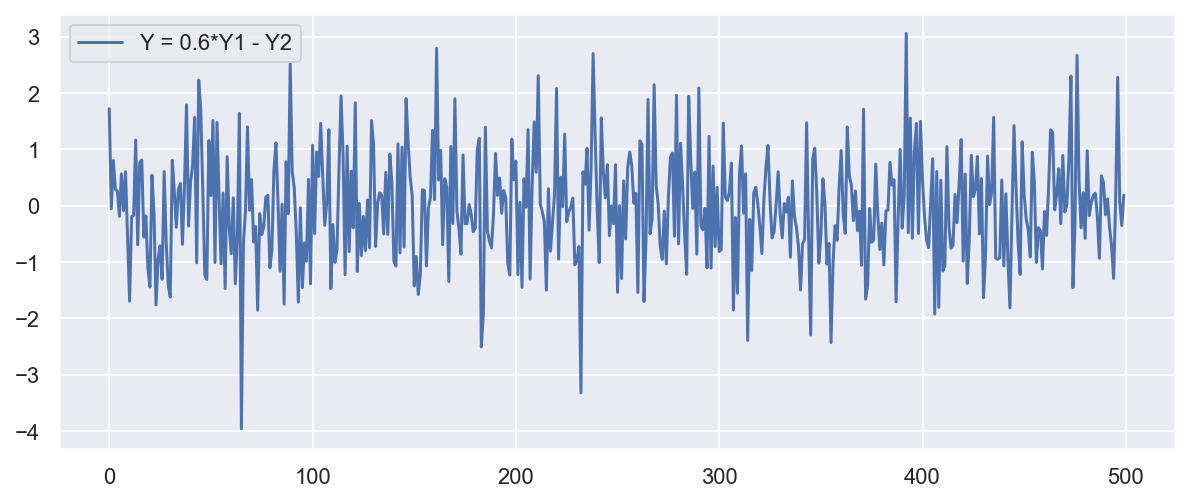

In [2]:
# 데이터 생성
np.random.seed(1)
Y1 = np.random.randn(500).cumsum()
Y2 = 0.6 * Y1 + np.random.randn(500)
Y = 0.6 * Y1 - Y2

# 시각화
plt.figure(figsize=(10,4))
plt.plot(Y1, 'g', label='Y1')
plt.plot(Y2, 'b', label='Y2')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(Y, label='Y = 0.6*Y1 - Y2')
plt.legend()
plt.show()

In [3]:
sm.tsa.coint(Y1,Y2)

(-22.680906567475315, 0.0, array([-3.91852234, -3.34840209, -3.05296032]))

Test for no-cointegration of a univariate equation.

The null hypothesis is no cointegration. Variables in y0 and y1 are
**assumed to be integrated of order 1, I(1).**

This uses the augmented Engle-Granger two-step cointegration test.
Constant or trend is included in 1st stage regression, i.e. in
cointegrating equation.

In [4]:
# VECM 공적분 확인
coint_result = sm.tsa.coint(Y1, Y2)
pd.DataFrame([coint_result[0], coint_result[1]], index=['statistics', 'p-value'], columns=['output'])

,output
statistics,-22.680907
p-value,0.000000


### 실습: 페어 트레이딩 Cointegration 모형화 및 해석

In [5]:
# 데이터 로딩
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2018, 12, 31)
raw1 = web.DataReader("005930.KS", 'yahoo', start, end)
raw2 = web.DataReader("005935.KS", 'yahoo', start, end)
# raw2 = web.DataReader("009150.KS", 'yahoo', start, end)

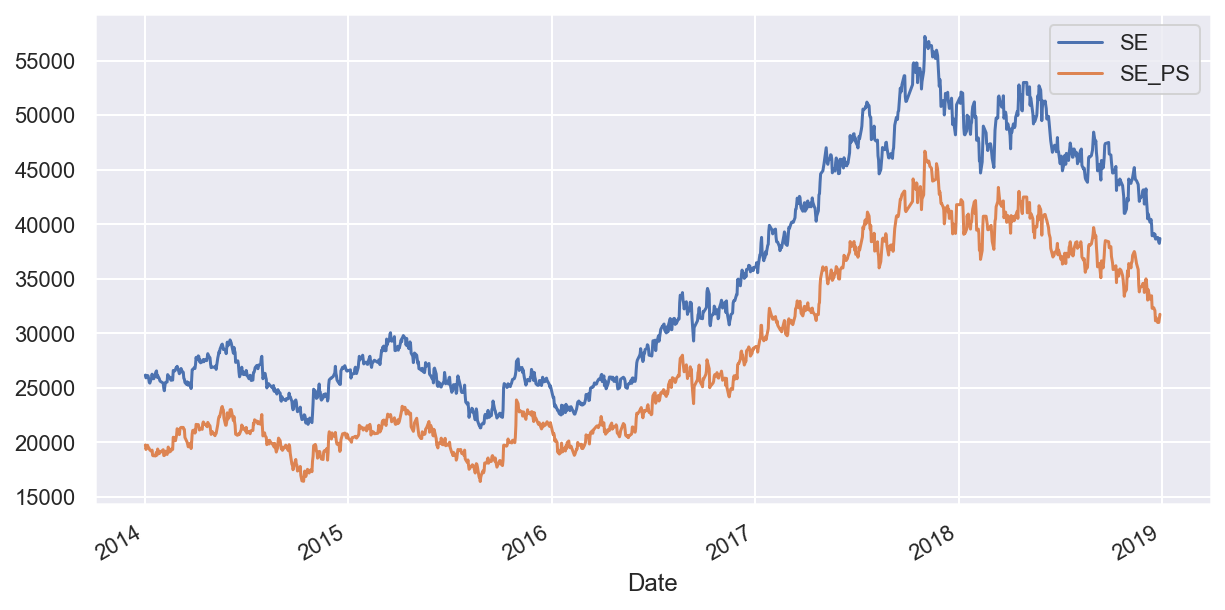

In [6]:
# 데이터 시각화
## 시계열 움직임
raw = pd.concat([raw1.Close, raw2.Close], axis=1).dropna()
raw.columns = ["SE", "SE_PS"]
raw.plot(figsize=(10,5))
plt.show()

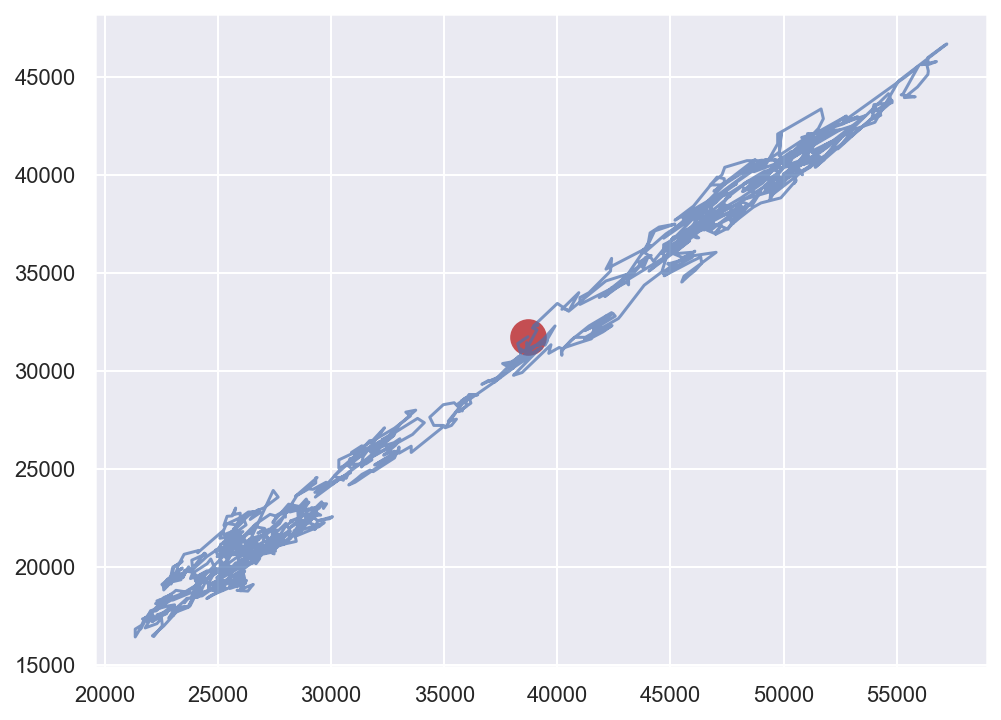

In [7]:
## 비교 움직임
plt.figure(figsize=(8,6))
plt.plot(raw.SE, raw.SE_PS, alpha=0.7)
plt.scatter(raw.SE.values[-1:], raw.SE_PS.values[-1:], c="r", s=300)
plt.show()

In [8]:
# 비정상성 차수 추론
target = raw.SE.copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y1_integ_order = 0
if integ_result[1] > 0.1:
    Y1_integ_order = Y1_integ_order + 1
target = raw.SE_PS.copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y2_integ_order = 0
if integ_result[1] > 0.1:
    Y2_integ_order = Y2_integ_order + 1
print('Y1_order: ', Y1_integ_order, 'Y2_order: ', Y2_integ_order)

Y1_order:  1 Y2_order:  1


In [9]:
# 회귀분석 적합
## 모델링
Y = raw.SE
X = raw.SE_PS
X = sm.add_constant(X)
fit = sm.OLS(Y, X).fit()
display(fit.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SE   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.295e+05
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:15:17   Log-Likelihood:                -10165.
No. Observations:                1221   AIC:                         2.033e+04
Df Residuals:                    1219   BIC:                         2.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        915.1881     97.943      9.344      0.000     723.033    1107.344
SE_PS          1.2147      0.003    359.877      0.000       1.208       1.221
==============================================================================
Omnibus:                       11.477   Durbin-Watson:                   0.124
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.735
Skew:                          -0.189   Prob(JB):                      0.00467
Kurtosis:                       2.738   Cond. No.                     9.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

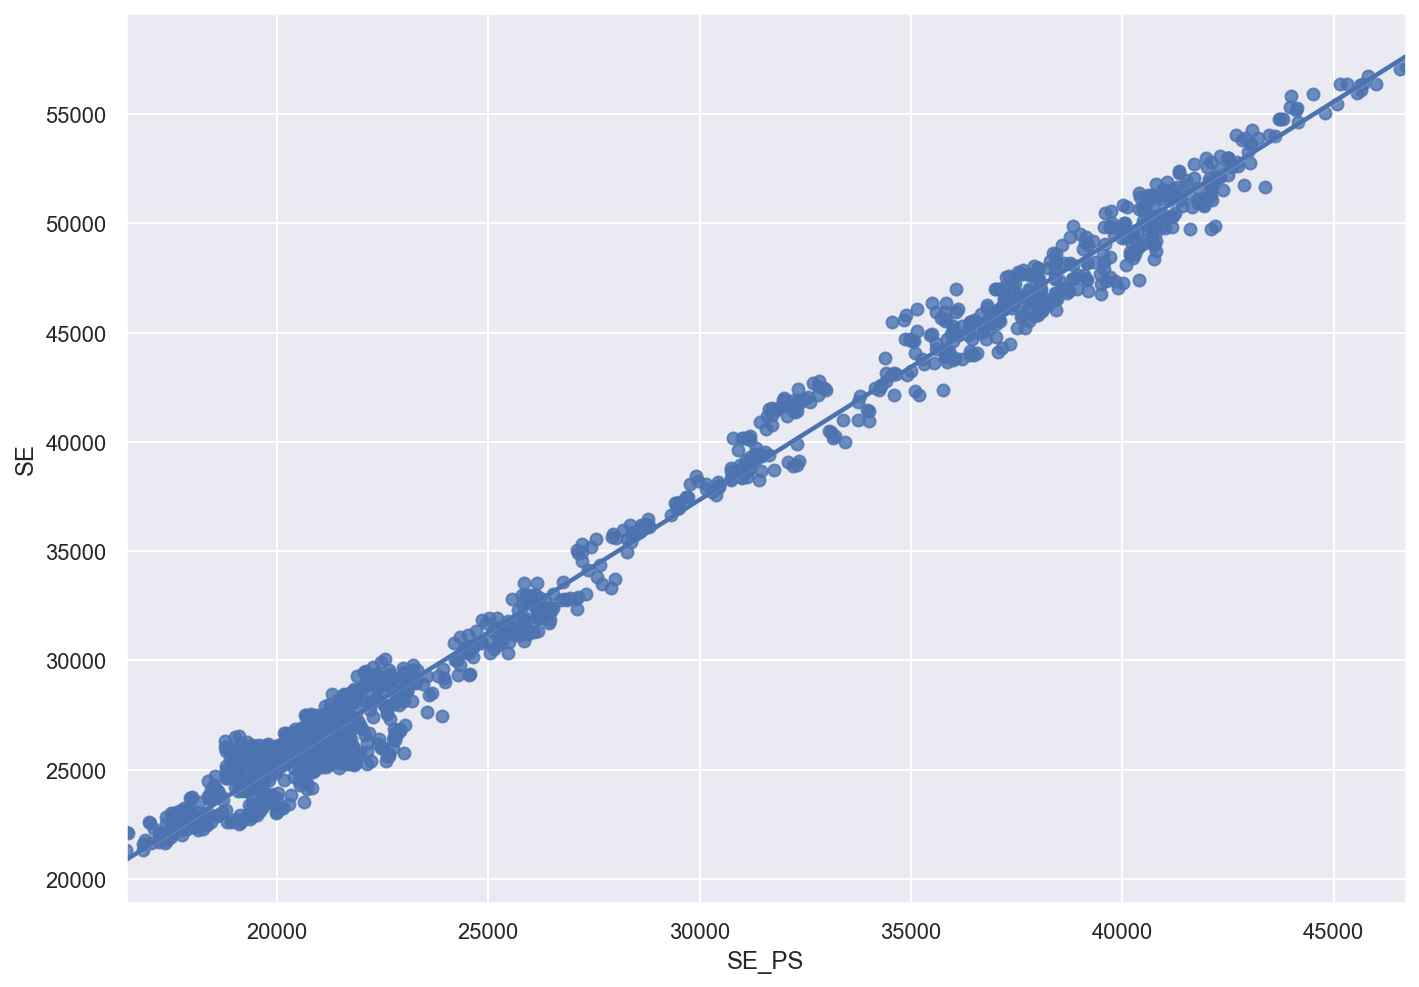

In [10]:
## 회귀분석 시각화
import seaborn as sns
plt.figure(figsize=(10,7))
sns.regplot(x="SE_PS", y="SE", data=raw)
plt.tight_layout()
plt.show()

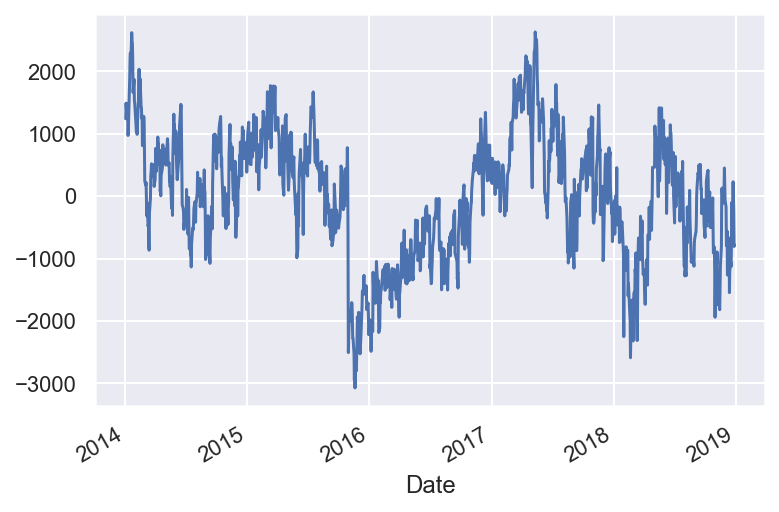

In [13]:
# 회귀분석 잔차 시각화
fit.resid.plot()
plt.show()

In [14]:
# 공적분 시계열 비정상성 테스트
target = fit.resid
display(pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                  index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations']))

Test Statistics        -3.742838
p-value                 0.003549
Used Lag                9.000000
Used Observations    1211.000000
dtype: float64

> **잔차 adf테스트상 정상성**

In [15]:
# VECM 공적분 테스트
coint_result = sm.tsa.coint(raw.SE, raw.SE_PS)
pd.DataFrame([coint_result[0], coint_result[1]], index=['statistics', 'p-value'], columns=['output'])

,output
statistics,-3.743068
p-value,0.016116
